<a href="https://www.kaggle.com/code/bhavinmoriya/stat-500-penn-state-university-2?scriptVersionId=122609516" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
import statistics as st
sns.set()
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Binomial Distribution

The binomial distribution is a special discrete distribution where there are two distinct complementary outcomes, a “success” and a “failure”.

We have a binomial experiment if ALL of the following four conditions are satisfied:

- The experiment consists of n identical trials.
- Each trial results in one of the two outcomes, called success and failure.
- The probability of success, denoted p, remains the same from trial to trial.
- The n trials are independent. That is, the outcome of any trial does not affect the outcome of the others.



Text(0.5, 0.98, '10 trial Histogram for Binomial distribution')

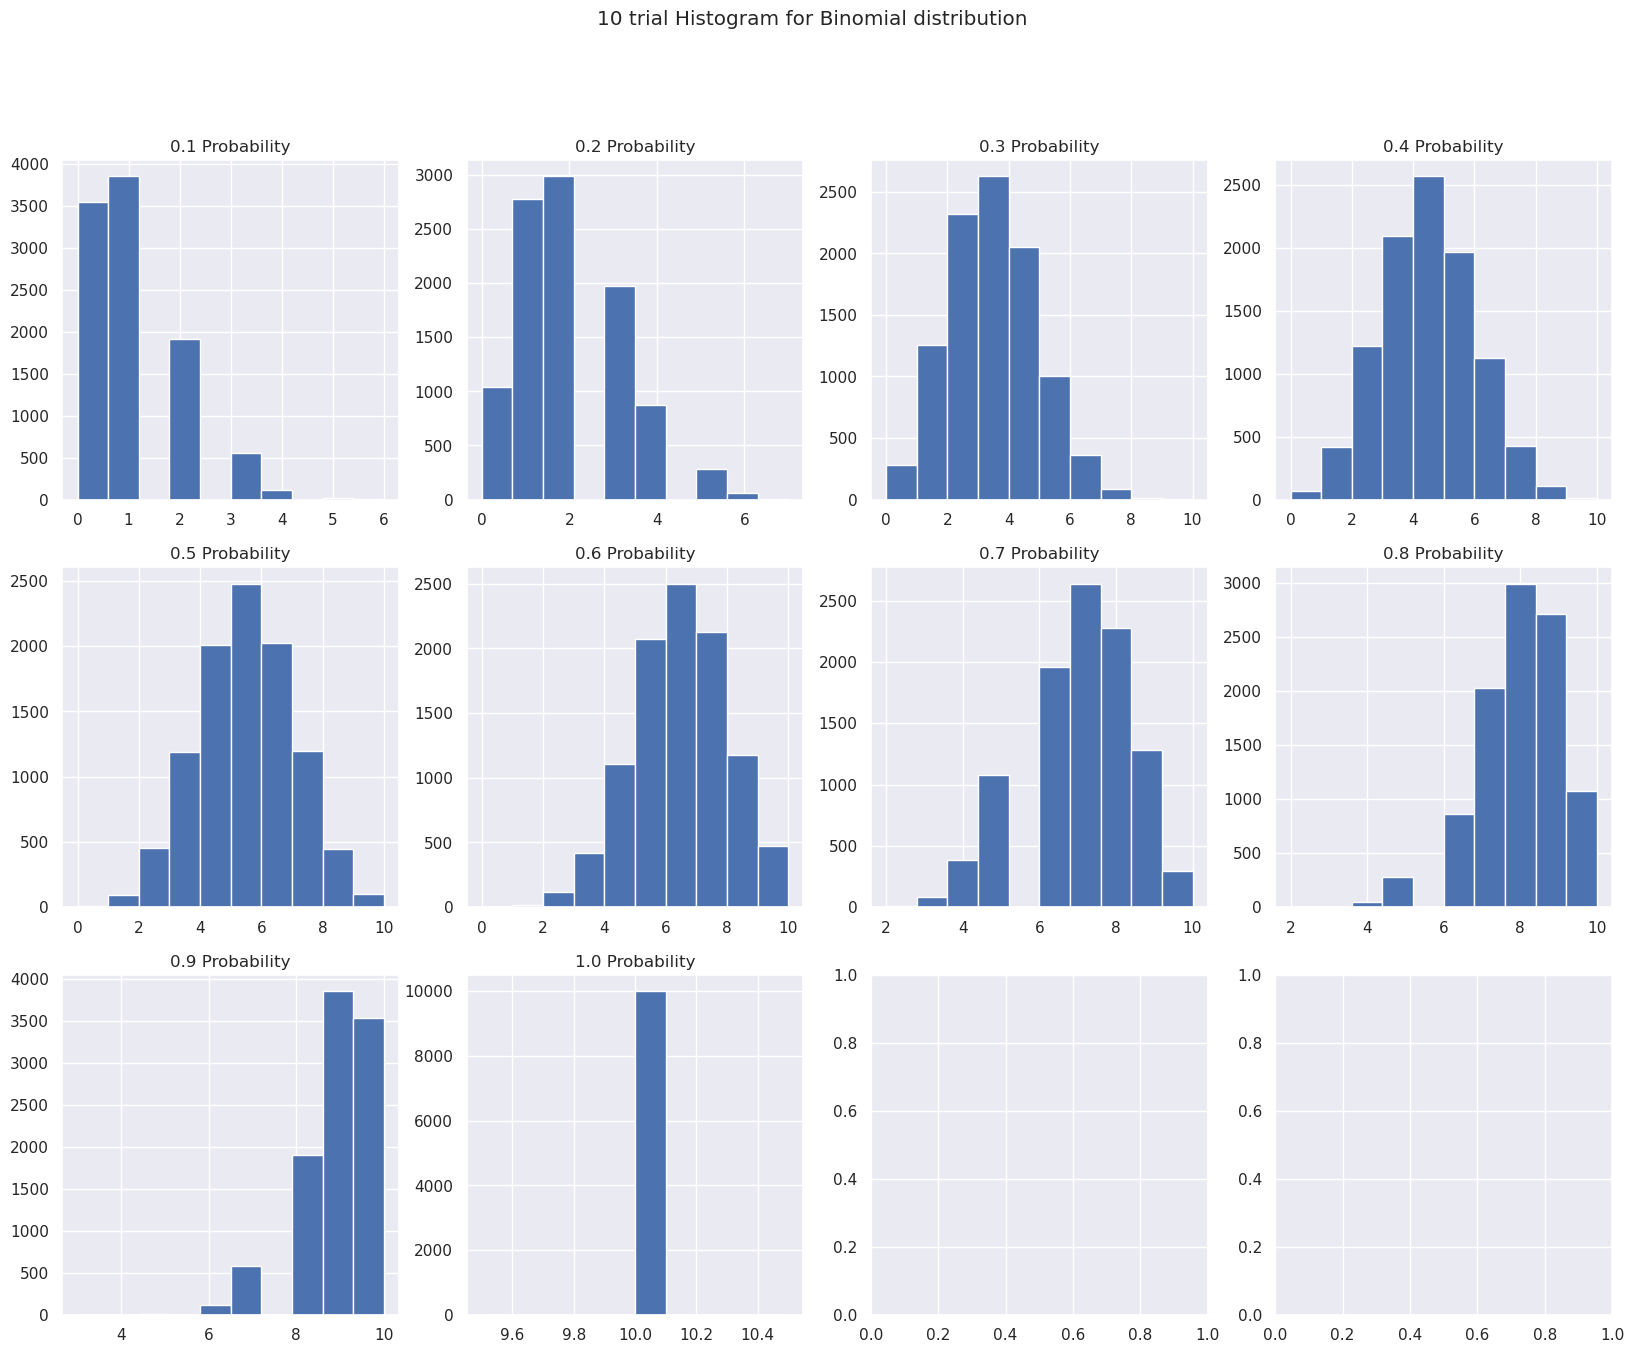

In [2]:
fig, ax = plt.subplots(3,4, figsize=(20,15))
ax = ax.flatten()
for i in range(1,11):
    ax[i-1].hist(binom.rvs(n=10, p=.1*i, size=10000))
    ax[i-1].set_title(f'{np.round(.1*i,2)} Probability')
plt.suptitle('10 trial Histogram for Binomial distribution')

An FBI survey shows that about 80% of all property crimes go unsolved. Suppose that in your town 3 such crimes are committed and they are each deemed independent of each other. What is the probability that 1 of 3 of these crimes will be solved?

In [3]:
print(f'The probability that 1 of 3 of these crimes will be solved is : {binom.pmf(n=3, p=.2, k=1)}')

The probability that 1 of 3 of these crimes will be solved is : 0.38400000000000006


For the FBI Crime Survey example, what is the probability that at least one of the crimes will be solved?

In [4]:
print(f'the probability that at least one of the crimes will be solved is : {1 - binom.pmf(n=3, p=.2, k=0)}')

the probability that at least one of the crimes will be solved is : 0.4879999999999999


In such a situation where three crimes happen, what is the expected value and standard deviation of crimes that remain unsolved? Here we apply the formulas for expected value and standard deviation of a binomial.

In [5]:
print(f'The expected value, Variance and standard deviation of crimes that remain unsolved are:\n\
{binom.mean(n=3, p=.8),binom.var(n=3, p=.8),binom.std(n=3, p=.8)}')

The expected value, Variance and standard deviation of crimes that remain unsolved are:
(2.4000000000000004, 0.48, 0.6928203230275509)


Cross-fertilizing a red and a white flower produces red flowers 25% of the time. Now we cross-fertilize five pairs of red and white flowers and produce five offspring. Find the probability that there will be no red-flowered plants in the five offspring.

$$Y= \text{No. of red flowered plants in the five offspring. Here, the number of red-flowered plants has a binomial distribution with } n = 5, p= .25$$ 


In [6]:
print(f'the probability that there will be no red-flowered plants in the five offspring is : \
{binom.pmf(n=5, p=.25, k=0)}')

the probability that there will be no red-flowered plants in the five offspring is : 0.2373046875


Find the probability that there will be four or more red-flowered plants.

In [7]:
binom.pmf(n=5, p=.25, k=4) + binom.pmf(n=5, p=.25, k=5)

0.015624999999999998

Of the five cross-fertilized offspring, how many red-flowered plants do you expect?


In [8]:
binom.mean(n=5, p=.25)

1.25

What is the standard deviation of Y, the number of red-flowered plants in the five cross-fertilized offspring?

In [9]:
binom.std(n=5, p=.25)

0.9682458365518543

# Continuous Probability Distributions
In the beginning of the course we looked at the difference between discrete and continuous data. The last section explored working with discrete data, specifically, the distributions of discrete data. In this lesson we're again looking at the distributions but now in terms of continuous data. Examples of continuous data include...

- the amount of rainfall in inches in a year for a city.
- the weight of a newborn baby.
- the height of a randomly selected student.

##  The Normal Distribution


In [10]:
from scipy.stats import norm

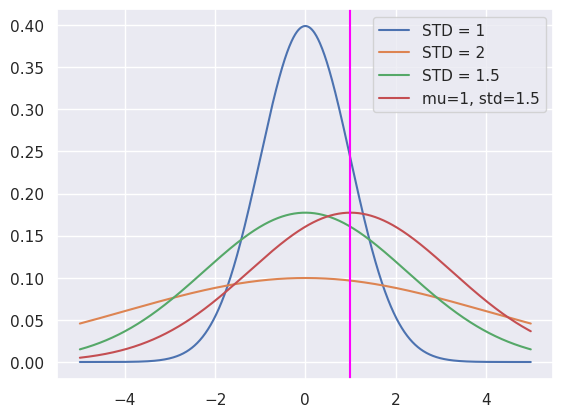

In [11]:
x = np.linspace(-5,5,1000)
for i in [1,2,1.5]:
    plt.plot(x, norm.pdf(x, loc=0, scale=i**2), label=f'STD = {i}')
plt.plot(x, norm.pdf(x,loc=1, scale=1.5**2), label='mu=1, std=1.5')
plt.axvline(1, c='magenta')
plt.legend();

Find the area under the standard normal curve to the left of 0.87.

In [12]:
norm.cdf(.87)

0.8078497978963038

Find the area under the standard normal curve to the right of 0.87.

In [13]:
1 - norm.cdf(.87)

0.19215020210369615

Find the area under the standard normal curve between 2 and 3.

In [14]:
norm.cdf(3) - norm.cdf(2)

0.021400233916549105

Find the 10th percentile of the standard normal curve. PPF -- Point percentile function -- is an inverse function of CDF. ppf(a) = x means P(X \le x) = a.

In [15]:
norm.ppf(.1)

-1.2815515655446004

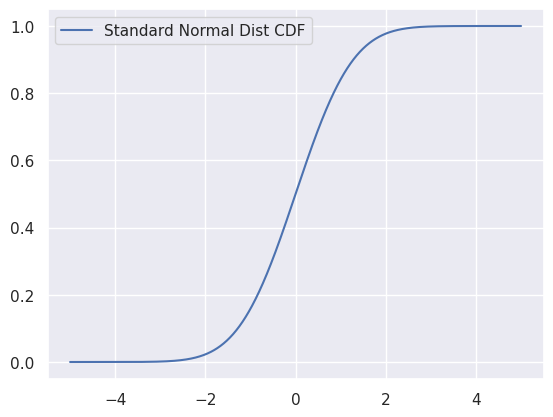

In [16]:
plt.plot(x, norm.cdf(x), label='Standard Normal Dist CDF')
plt.legend()

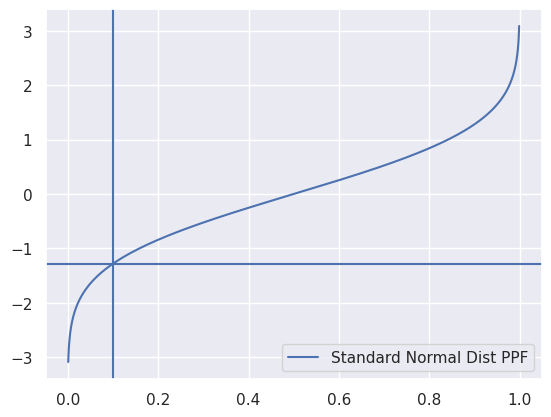

In [17]:
a = np.linspace(0,1,1000)
plt.plot(a, norm.ppf(a), label='Standard Normal Dist PPF')
plt.axvline(.10)
plt.axhline(norm.ppf(.1))
plt.legend()

# Z-value, Z-score, or Z
The Z-value (or sometimes referred to as Z-score or simply Z) represents the number of standard deviations an observation is from the mean for a set of data. To find the z-score for a particular observation we apply the following formula:

$$ Z = \frac{\text{Observed value - Mean}}{\text{SD}}$$

Let's take a look at the idea of a z-score within context.

For a recent final exam in STAT 500, the mean was 68.55 with a standard deviation of 15.45.

- If you scored an 80%: .74, which means your score of 80 was 0.74 SD above the mean.
- If you scored a 60%: -.55, which means your score of 60 was 0.55 SD below the mean.

## Characteristics of Z-scores
The scores can be positive or negative.
For data that is symmetric (i.e. bell-shaped) or nearly symmetric, a common application of Z-scores for identifying potential outliers is for any Z-scores that are beyond ± 3.
Maximum possible Z-score for a set of data is $$\frac{n - 1}{\sqrt{n}}$$



Example 3-13: Heights
According to the Center for Disease Control, heights for U.S. adult females and males are approximately normal.

Females: mean of 64 inches and SD of 2 inches

Males: mean of 69 inches and SD of 3 inches

Find the probability of a randomly selected U.S. adult female being shorter than 65 inches.

In [18]:
# the probability of a randomly selected U.S. adult female being shorter than 65 inches.
# loc=64=mean, scale=2=sd
norm.cdf(65, loc=64, scale=2)

0.6914624612740131

In [19]:
# the probability of a randomly selected U.S. adult female being shorter than 65 inches. This could be calculated
# using z-score in a following mannner
def zscore(observed, mean, sd):
    return (observed - mean) / sd

z = zscore(65, 64, 2)
print(f'the probability of a randomly selected U.S. adult female being shorter than 65 inches \
is : {norm.cdf(z)}')

the probability of a randomly selected U.S. adult female being shorter than 65 inches is : 0.6914624612740131


So, roughly there this a 69% chance that a randomly selected U.S. adult female would be shorter than 65 inches.

As you could see both value matches. Below we could run some for loop if this is the case often.

In [20]:
j = 1
for i in [.5*i for i in range(10)]:
    
    z = zscore(65 + j*i, 64, 2)
    print(f'Prob using z score : \t\t{norm.cdf(z)}')
    print(f'Prob without doing z score :    {norm.cdf(65 + j*i, loc=64, scale=2)}\n\n')
    j *= -1

Prob using z score : 		0.6914624612740131
Prob without doing z score :    0.6914624612740131


Prob using z score : 		0.5987063256829237
Prob without doing z score :    0.5987063256829237


Prob using z score : 		0.8413447460685429
Prob without doing z score :    0.8413447460685429


Prob using z score : 		0.4012936743170763
Prob without doing z score :    0.4012936743170763


Prob using z score : 		0.9331927987311419
Prob without doing z score :    0.9331927987311419


Prob using z score : 		0.2266273523768682
Prob without doing z score :    0.2266273523768682


Prob using z score : 		0.9772498680518208
Prob without doing z score :    0.9772498680518208


Prob using z score : 		0.10564977366685535
Prob without doing z score :    0.10564977366685535


Prob using z score : 		0.9937903346742238
Prob without doing z score :    0.9937903346742238


Prob using z score : 		0.040059156863817086
Prob without doing z score :    0.040059156863817086




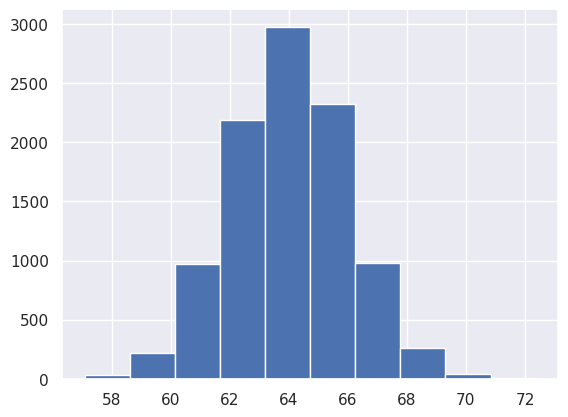

In [21]:
# we could create the fake data of female heights 
female_height = norm.rvs(size=10000, loc=64, scale=2)
plt.hist(female_height);

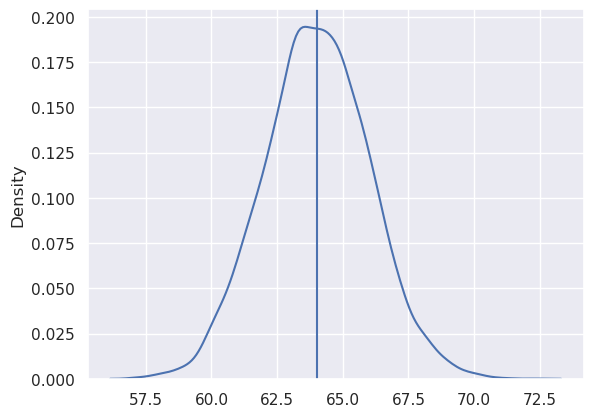

In [22]:
sns.kdeplot(female_height)
plt.axvline(64)

# Example 3-14: Weights

The weights of 10-year-old girls are known to be normally distributed with a mean of 70 pounds and a standard deviation of 13 pounds. Find the percentage of 10-year-old girls with weights between 60 and 90 pounds.

In other words, we want to find $P(60< X<90)$
, where $X$ has a normal distribution with mean 70 and standard deviation 13.

In [23]:
print(f'The prob is : {norm.cdf(90, loc=70, scale=13) - norm.cdf(60, loc=70, scale=13)}')

The prob is : 0.717153933451169


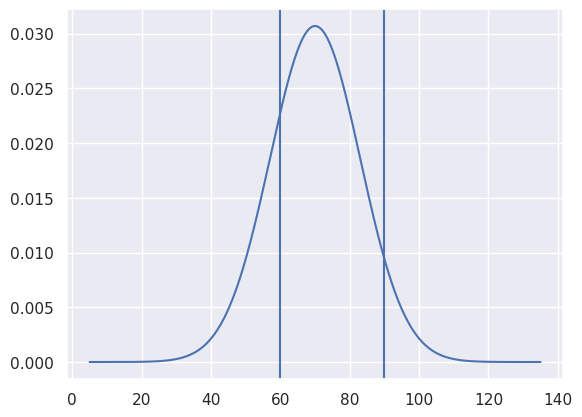

In [24]:
x = np.linspace(70-5*13,70+5*13,1000)
y = norm.pdf(x, loc=70, scale=13)
plt.plot(x, y)

plt.axvline(90)
plt.axvline(60)


We obtain that 71.76% of 10-year-old girls have weight between 60 pounds and 90 pounds.



In [25]:
# Find the 60th percentile for the weight of 10-year-old girls given that the weight is normally distributed 
# with a mean 70 pounds and a standard deviation of 13 pounds.
norm.ppf(.6, loc=70, scale=13)

73.2935123407654

Therefore, the 60th percentile of 10-year-old girls' weight is 73.29 pounds.

#  The Empirical Rule
The Empirical Rule is sometimes referred to as the 68-95-99.7% Rule. The rule is a statement about normal or bell-shaped distributions. Observe as follows,



In [26]:
for i in range(1,8):
    print(f'{i}-SD from mean has the probability : \
    {norm.cdf(70+i*13, loc=70, scale=13) - norm.cdf(70-i*13, loc=70, scale=13)}')

1-SD from mean has the probability :     0.6826894921370859
2-SD from mean has the probability :     0.9544997361036416
3-SD from mean has the probability :     0.9973002039367398
4-SD from mean has the probability :     0.9999366575163338
5-SD from mean has the probability :     0.9999994266968562
6-SD from mean has the probability :     0.9999999980268246
7-SD from mean has the probability :     0.9999999999974403


In [27]:
for i in range(1,8):
    print(f'{i}-SD from mean has the probability : \
    {norm.cdf(i) - norm.cdf(-i)}')# Standard Normal Dist

1-SD from mean has the probability :     0.6826894921370859
2-SD from mean has the probability :     0.9544997361036416
3-SD from mean has the probability :     0.9973002039367398
4-SD from mean has the probability :     0.9999366575163338
5-SD from mean has the probability :     0.9999994266968562
6-SD from mean has the probability :     0.9999999980268246
7-SD from mean has the probability :     0.9999999999974403


# Sampling Error
The error resulting from using a sample characteristic to estimate a population characteristic.
Sample size and sampling error: As the dotplots above show, the possible sample means cluster more closely around the population mean as the sample size increases. Thus, the possible sampling error decreases as sample size increases.

What happens when the population is not small, as in the pumpkin example?

## Sample Means with Large Samples: Exam Example
An instructor of an introduction to statistics course has 200 students. The scores out of 100 points are shown in the histogram.

The population mean is 71.18 and the population standard deviation is 10.73

Let's demonstrate the sampling distribution of the sample means using the StatKey website. The first video will demonstrate the sampling distribution of the sample mean when n = 10 for the exam scores data. The second video will show the same data but with samples of n = 30.

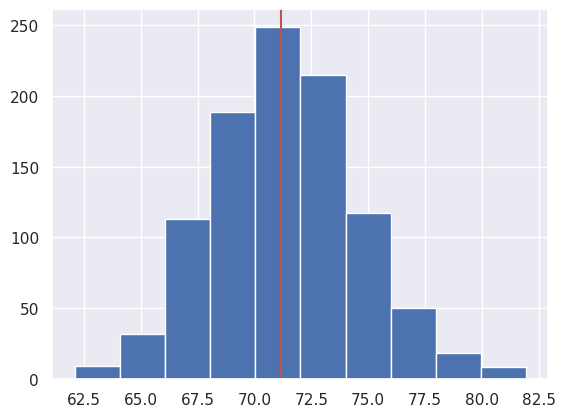

In [28]:
students = norm.rvs(size=200, loc=71.18, scale=10.73)

sample_dist = [np.random.choice(students, 10).mean() for _ in range(1000)]
plt.hist(sample_dist)
plt.axvline(71.18, color='r')
# sns.kdeplot(sample_dist)

<AxesSubplot:ylabel='Density'>

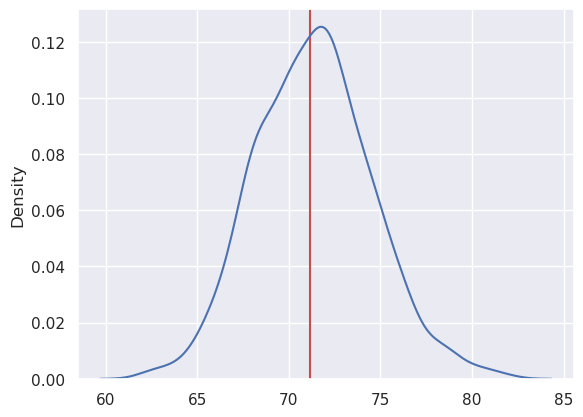

In [29]:
plt.axvline(71.18, color='r')
sns.kdeplot(sample_dist)

In [30]:
# diffrence between mean of sample statistics is not far from population statistic(mean in this case)

students.mean() - np.mean(sample_dist)

-0.20357016823035678

# Speedboat Engines
The engines made by Ford for speedboats have an average power of 220 horsepower (HP) and standard deviation of 15 HP. You can assume the distribution of power follows a normal distribution.

Consumer Reports® is testing the engines and will dispute the company's claim if the sample mean is less than 215 HP. If they take a sample of 4 engines, what is the probability the mean is less than 215?

**PS. While we do sample statistics, we take sample mean = populationn mean and sample_mean std (that is, std of means of sampling distribution) = population std / $\sqrt(n)$, where n is size of sample.**

In [31]:
norm.cdf(215, loc=220, scale=15/np.sqrt(4))

0.2524925375469229

Using the speedboat engines example above, answer the following question.

If Consumer Reports® samples 100 engines, what is the probability that the sample mean will be less than 215?

In [32]:
norm.cdf(215, loc=220, scale=15/np.sqrt(100))

0.0004290603331968372

# Weights of Baby Giraffes
The weights of baby giraffes are known to have a mean of 125 pounds and a standard deviation of 15 pounds.

If we obtained a random sample of 40 baby giraffes,

- what is the probability that the sample mean will be between 120 and 130 pounds?
- what is the 75th percentile of the sample means of size n=40?


In [33]:
print(f'The probability that the sample mean will be between 120 and 130 pounds : \
{norm.cdf(130,loc=125, scale=15/np.sqrt(40)) - norm.cdf(120,loc=125, scale=15/np.sqrt(40))}')

The probability that the sample mean will be between 120 and 130 pounds : 0.9649850189803375


In [34]:
print(f'the 75th percentile of the sample means of size n=40 : {norm.ppf(.75, loc=125, scale=15/np.sqrt(40))}')

the 75th percentile of the sample means of size n=40 : 126.59969290179322


# iPhone Users
Suppose it is known that 43% of Americans own an iPhone. If a random sample of 50 Americans were surveyed, what is the probability that the proportion of the sample who owned an iPhone is between 45% and 50%?

In [35]:
n = 50
p = .43
scale = np.sqrt(p*(1-p)/n)
norm.cdf(.5, loc=.43, scale=scale) - norm.cdf(.45, loc=.43, scale=scale)

0.22886618040339746

As we might feel, that raising the sample size would reduce the prob of sample proportion in 45 to 50 percent.

In [36]:
for i in range(10,50000, 5000):
    scale = np.sqrt(p*(1-p)/i)
    print(f'For sample size = {i}, the prob is :\
    {norm.cdf(.5, loc=.43, scale=scale) - norm.cdf(.45, loc=.43, scale=scale)}')

For sample size = 10, the prob is :    0.12178034961342343
For sample size = 5010, the prob is :    0.002122115191319107
For sample size = 10010, the prob is :    2.6520643550798084e-05
For sample size = 15010, the prob is :    3.722973694886278e-07
For sample size = 20010, the prob is :    5.499800170838398e-09
For sample size = 25010, the prob is :    8.362932568672932e-11
For sample size = 30010, the prob is :    1.2956302697375577e-12
For sample size = 35010, the prob is :    2.0317081350640365e-14
For sample size = 40010, the prob is :    3.3306690738754696e-16
For sample size = 45010, the prob is :    0.0


If a random sample of size of seventy five was surveyed, what is the probability we would find more than 50% of Americans with an iPhone?



In [37]:
n = 75
p = .43
scale = np.sqrt(p*(1-p)/n)
1 - norm.cdf(.5, loc=.43, scale=scale)

0.11038277568673194

Therefore, there is a 11.03% chance to get a sample proportion of 50% or higher in a sample size of 75.